# 1 . Import libraries & csv dataset 

In [16]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
# Reading csv data set
df = pd.read_csv("adult.csv" , na_values='?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [18]:
# exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [19]:
#Mapping binary values to the target variable ( income )

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# 2 . 1  Identify the presence of missing values

In [20]:
#  Reading data set and finding total not null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

# 2.2 fill the missing values with mean for numerical attributes

In [21]:
# list of numerical features
def get_numerical_features(df):
    numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
    print('Number of numerical features : ', len(numerical_features))
    return numerical_features

In [22]:
get_numerical_features(df)

Number of numerical features :  7


['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'income']

In [23]:
# splitting numerical attribues alone
df_num = df[[feature for feature in df.columns if df[feature].dtypes != 'O']]
df_num.isnull().sum()

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

# none of the numerical attribue has missing value

In [24]:
# Exploring numerical attribues
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# 2.3 fill the missing values with mode value for categorical attributes

In [25]:
# Exploring categorical attribues
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [26]:
# splitting categorical attribues alone
df_cat = df.select_dtypes(include='object')
df_cat.mode()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [27]:
df_num = df[[feature for feature in df.columns if df[feature].dtypes == 'O']]
df_num.isnull().sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
dtype: int64

In [28]:
# filling missing values with mode
df['workclass'] = df['workclass'].fillna('Private')
df['occupation'] = df['occupation'].fillna('Prof-specialty')
df['native.country'] = df['native.country'].fillna('United-States')

In [29]:
# View dataset post data processing
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [30]:
#  viewing not null values count in data set
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# 3. Visualize the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x162BCB20>,
      dtype=object)

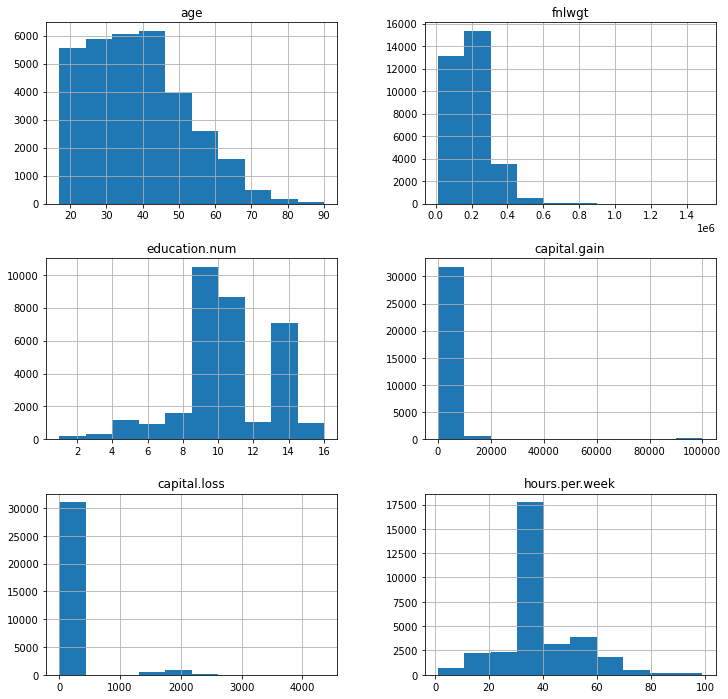

In [31]:
#Visualizing the numerical attributes

rcParams['figure.figsize'] = 12, 12
df[['age', 'workclass', 'fnlwgt', 'education' , 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

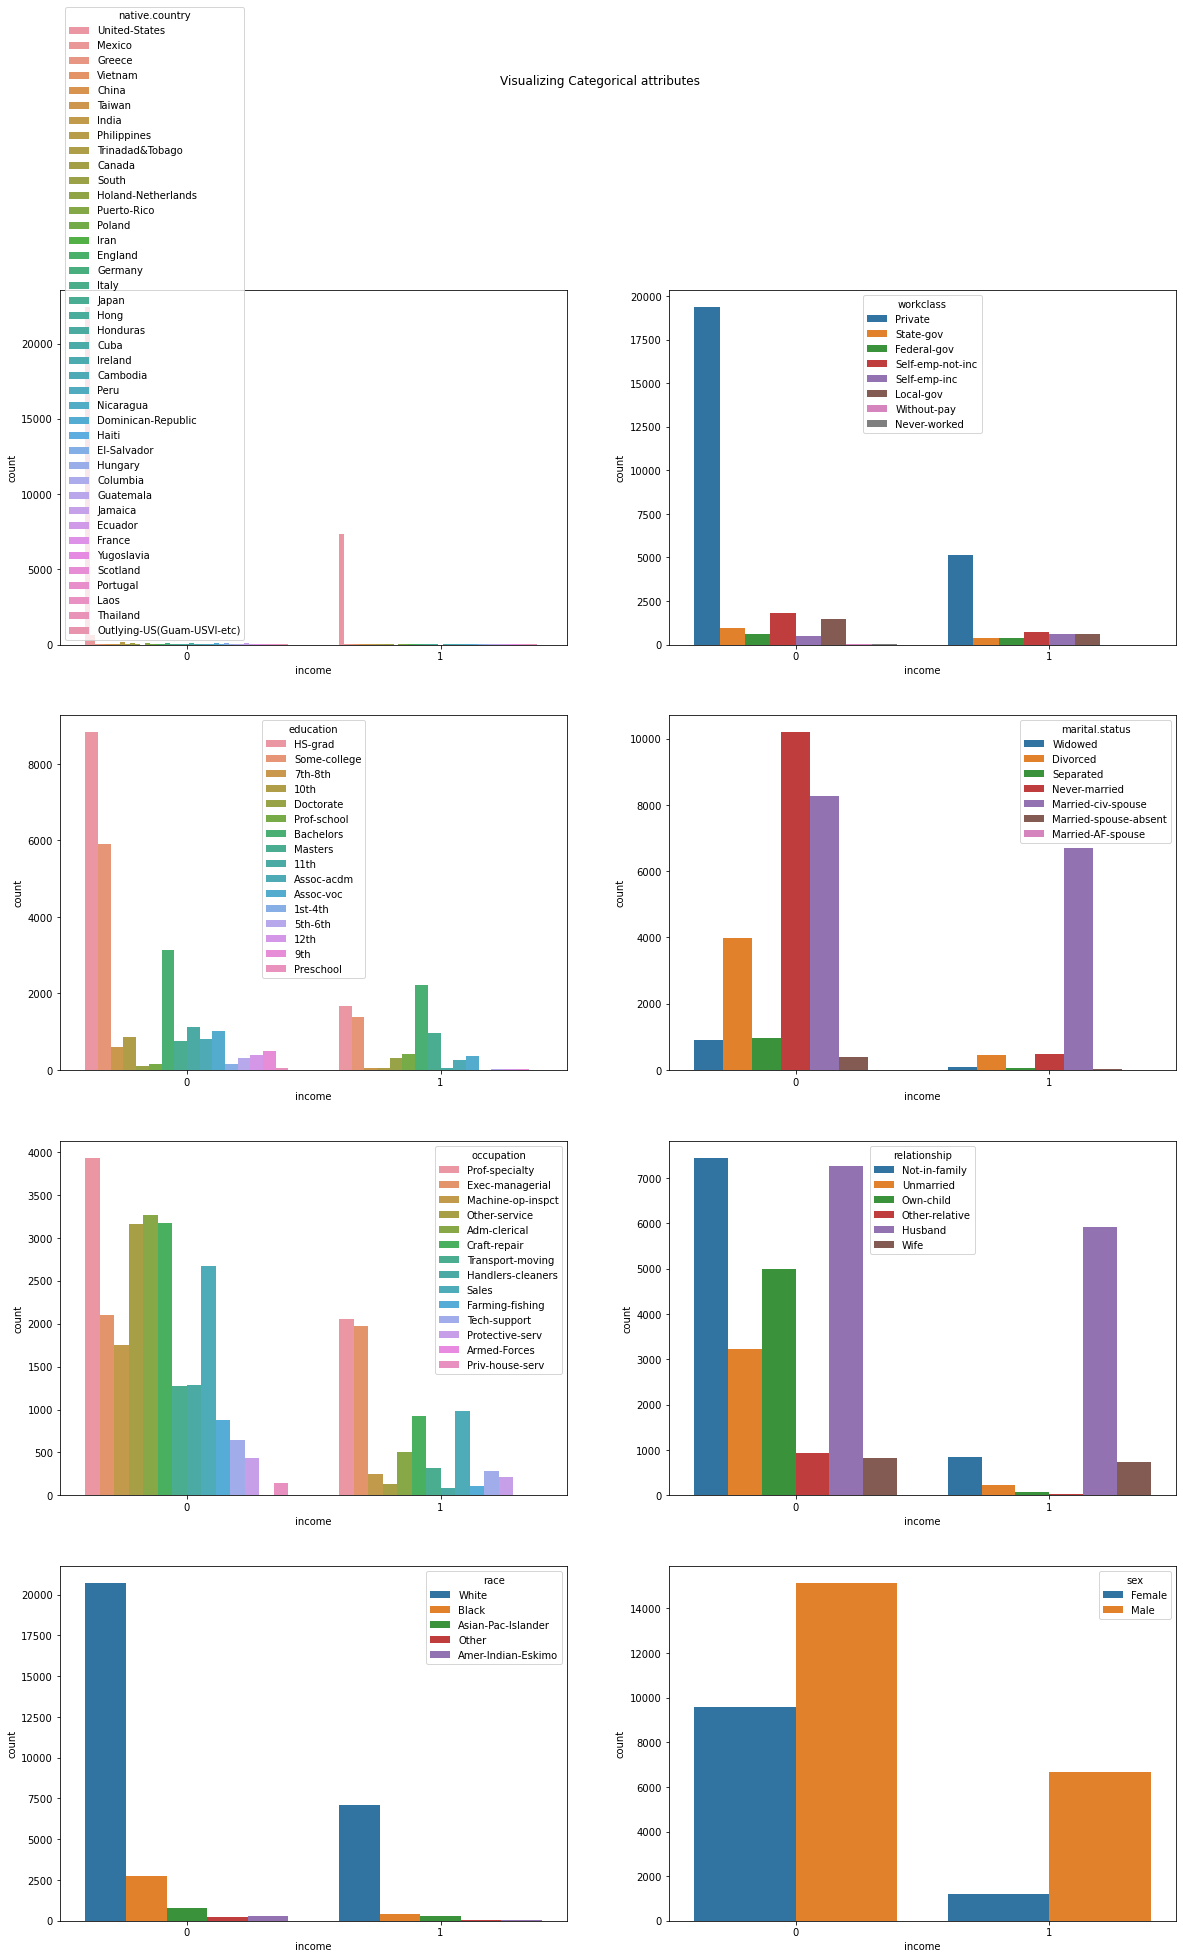

In [32]:
#Visualizing the categorical attributes
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

fig.suptitle('Visualizing Categorical attributes')

sns.countplot(ax=axes[0, 1],x = 'income', hue = 'workclass', data = df)
sns.countplot(ax=axes[1, 0],x = 'income', hue = 'education', data = df)
sns.countplot(ax=axes[1, 1],x = 'income', hue = 'marital.status', data = df)
sns.countplot(ax=axes[2, 0],x = 'income', hue = 'occupation', data = df)
sns.countplot(ax=axes[2, 1],x = 'income', hue = 'relationship', data = df)
sns.countplot(ax=axes[3, 0],x = 'income', hue = 'race', data = df)
sns.countplot(ax=axes[3, 1],x = 'income', hue = 'sex', data = df)
sns.countplot(ax=axes[0, 0],x = 'income', hue = 'native.country', data = df)

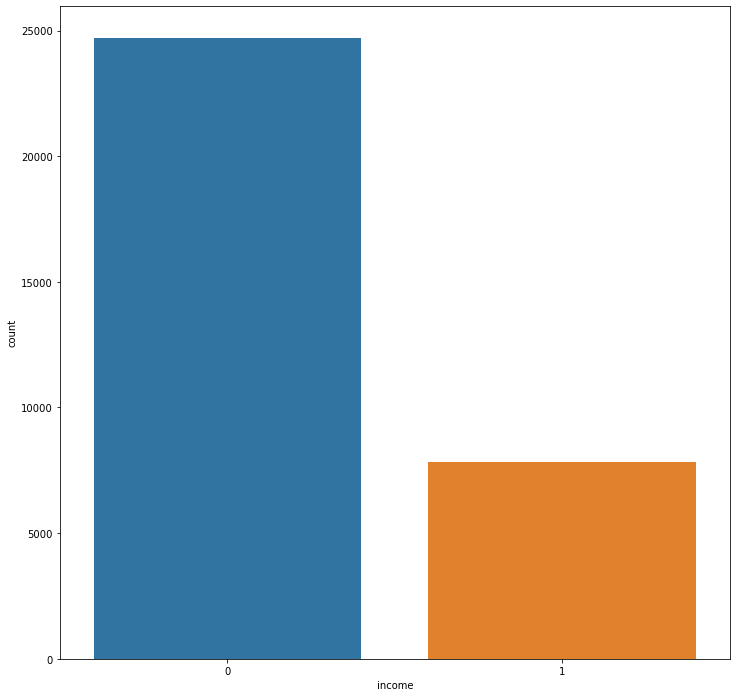

In [33]:
# Visualizing target variables ( Count of >50K & <=50K )
sns.countplot(df['income'],label="Count")
plt.show()

#  4.1 Extract X as all columns except the Income column ,Extract Y as Income column

In [34]:
# Changing the Categorical Values to Numerical values
categorical_variables = df_cat.columns
label_encoder_feat = {}
for i, feature in enumerate(categorical_variables):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [35]:
#Splitting the data set into features and Income to X
X = df.drop(['income'], axis=1)
#Splitting Income attribute as Y from the data set 
Y = df['income']
X.shape,Y.shape

((32561, 14), (32561,))

# 5  Split the data into training set and testing set

In [36]:
# Shuffling the Data Set
df = shuffle(df)
# Splitting data set in to training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (22792, 14)
Test data set size :  (9769, 14)


# 6 Model the classifier using GaussianNB and MultinomialNB

In [37]:
# Model-1 GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gauss = gaussian.predict(X_test)

In [38]:
# Model-2 MultinomialNB
multinomial = MultinomialNB(alpha=0.01)
multinomial.fit(X_train, Y_train)
Y_pred_multinomial = multinomial.predict(X_test)

# 7 Compute the accuracy and confusion matrix

## Accuracy calculation

In [39]:
gauess_acc_score = round(accuracy_score(Y_test, Y_pred_gauss)* 100,2)
multinomial_acc_score = round(accuracy_score(Y_test, Y_pred_multinomial)* 100,2)

print ("The accuracy of model GaussianNB : ",gauess_acc_score)
print ("The accuracy of model MultinomialNB : ",multinomial_acc_score)

The accuracy of model GaussianNB :  79.51
The accuracy of model MultinomialNB :  78.34


## Confusion matrix

In [40]:
gauss_conf_mat = confusion_matrix(Y_test, Y_pred_gauss)
multinomial_conf_mat = confusion_matrix(Y_test, Y_pred_multinomial)

print("Confustion matrix for GaussianNB : \n" , confusion_matrix(Y_test, Y_pred_gauss))
print("Confustion matrix for MultinomialNB : \n" , confusion_matrix(Y_test, Y_pred_multinomial))


Confustion matrix for GaussianNB : 
 [[7035  375]
 [1627  732]]
Confustion matrix for MultinomialNB : 
 [[7086  324]
 [1792  567]]
